In [1]:
## importing all the important libraries

In [296]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,jaccard_similarity_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report


In [203]:
df=pd.read_csv('D:\\python\\income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [204]:
df.shape

(32561, 15)

In [205]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 20.2 MB


In [206]:
df.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 income                2
dtype: int64

In [207]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [208]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [209]:
df.columns=df.columns.str.replace(' ','')

In [210]:
### Exploing categorical value

In [211]:
categorical=[var for var in df.columns if df[var].dtype=='O']
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [212]:
for var in categorical:
    print()
    print(df[var].value_counts())


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

 Prof-specialty       4140
 Craft-repair         4099
 Exec-manage

In [213]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [214]:
### frequency distribution of income

In [215]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [216]:
### Percentage frequency distribution of income

In [217]:
df['income'].value_counts()/len(df)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

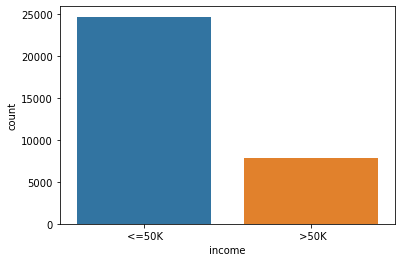

In [218]:
sns.countplot(x='income',data=df)

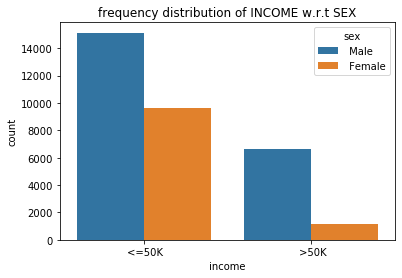

In [219]:
sns.countplot(x='income',hue='sex',data=df)
plt.title('frequency distribution of INCOME w.r.t SEX')
plt.show()

In [220]:
### we can see here white make more money then other race category

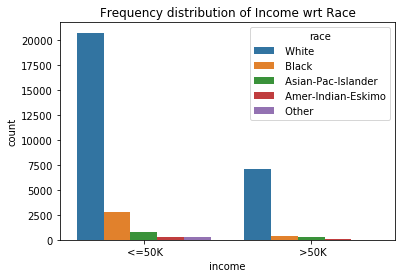

In [221]:
sns.countplot(x='income',hue='race',data=df)
plt.title('Frequency distribution of Income wrt Race')
plt.show()

In [222]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [223]:
df['workclass'].replace(' ?', np.NaN,inplace=True)

In [224]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

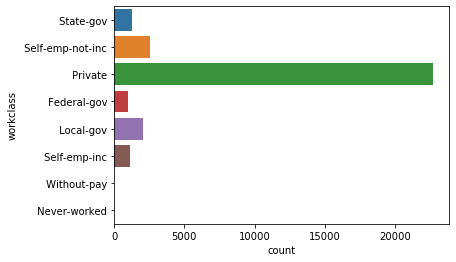

In [225]:
sns.countplot(y='workclass',data=df)

In [226]:
### we can see here lot more private woker than other category of worker

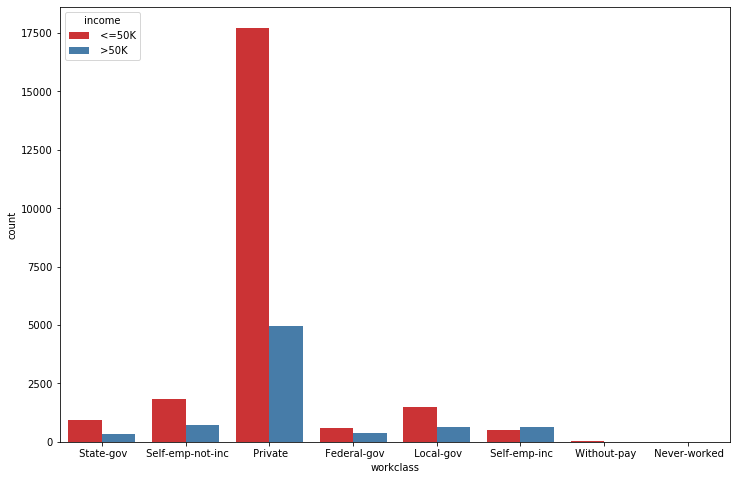

In [227]:
f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='workclass',hue='income',data=df,palette='Set1')

In [228]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [229]:
df['occupation'].replace(' ?', np.NaN,inplace=True)

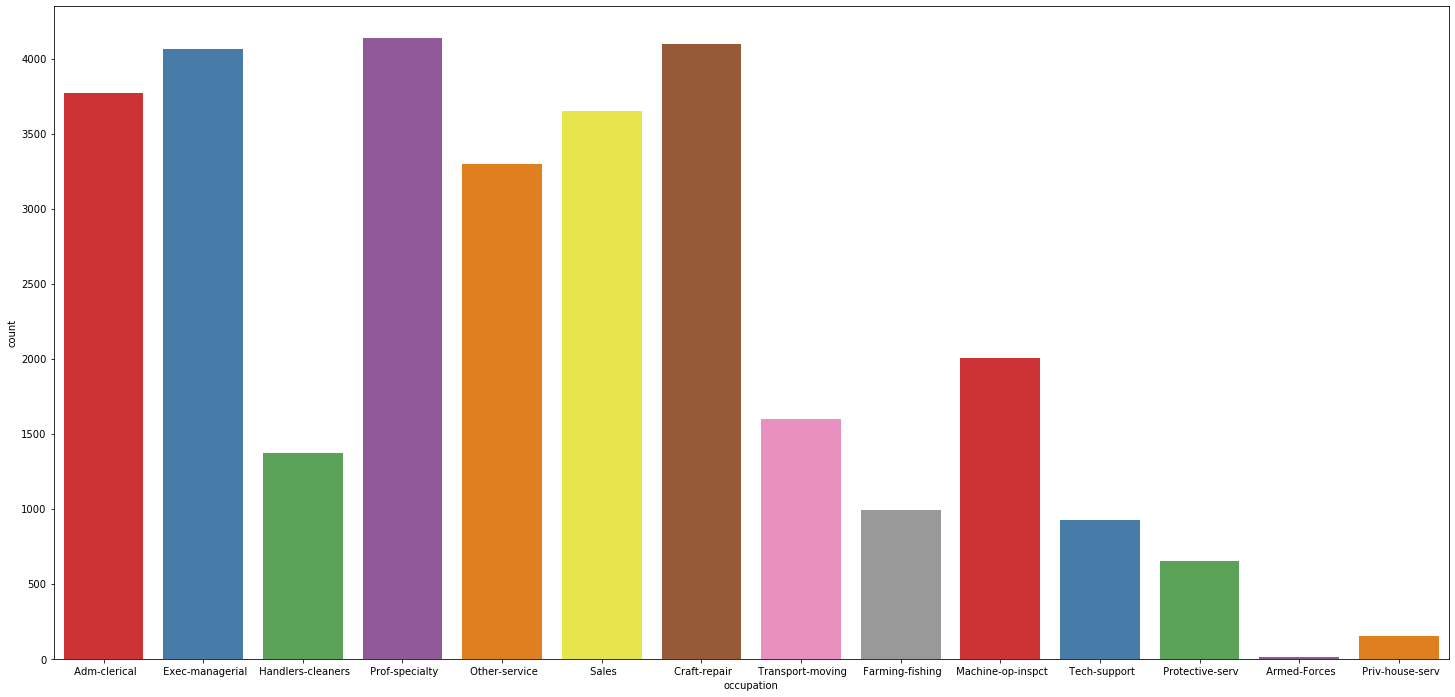

In [230]:
f,ax=plt.subplots(figsize=(25,12))
sns.countplot(x='occupation',data=df,palette='Set1')

In [231]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [232]:
df['native-country'].replace(' ?', np.NaN,inplace=True)

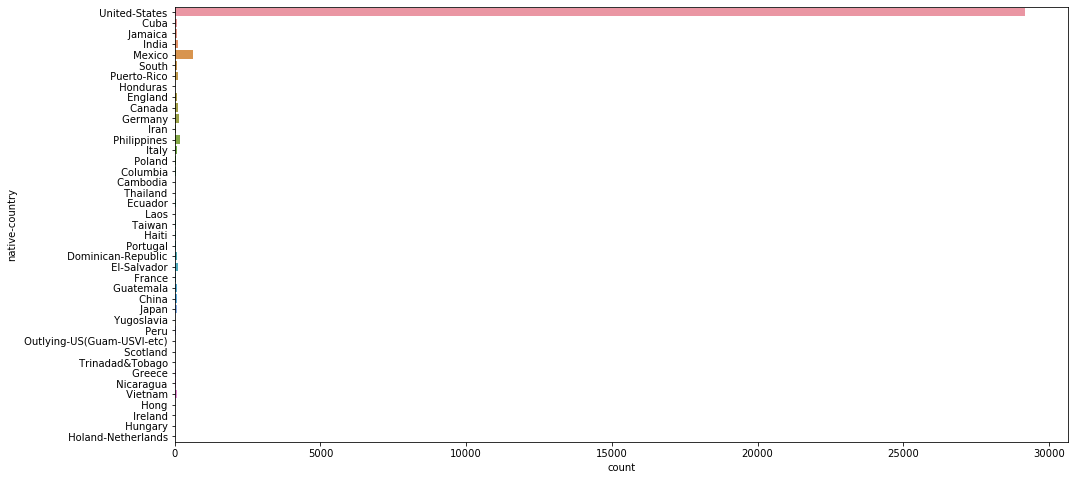

In [233]:
plt.figure(figsize=(16,8))
sns.countplot(y='native-country',data=df)

In [234]:
### we can see here male worker are more than female worker in all working category

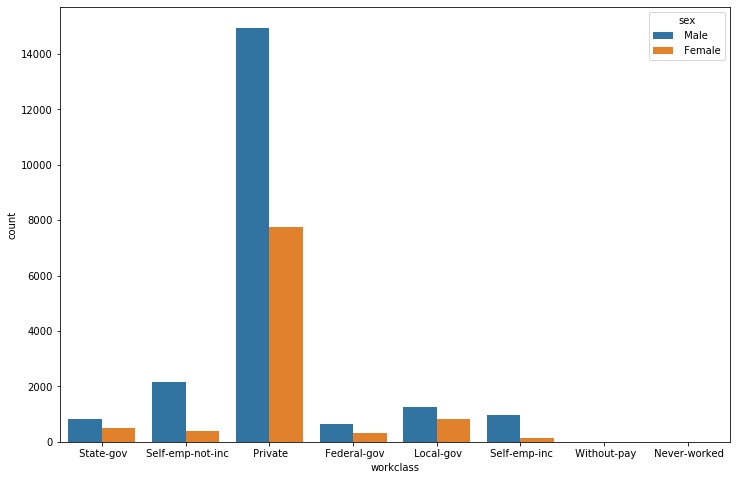

In [235]:
f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='workclass',hue='sex',data=df)

In [236]:
### checking for categorical value in categories

In [237]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
native-country     583
income               0
dtype: int64

In [238]:
### Exploring Numerical Features

In [239]:
numerical=[var for var in df.columns if df[var].dtype !='O']
numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [240]:
### as we can see there are 6 numerical value

In [241]:
df[numerical].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [242]:
### there are no null value in numerical feature

In [243]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [244]:
df[numerical].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [245]:
### as we can see here there alot of outliers

Text(0.5, 1.0, 'Data Box-Plot Visulaization')

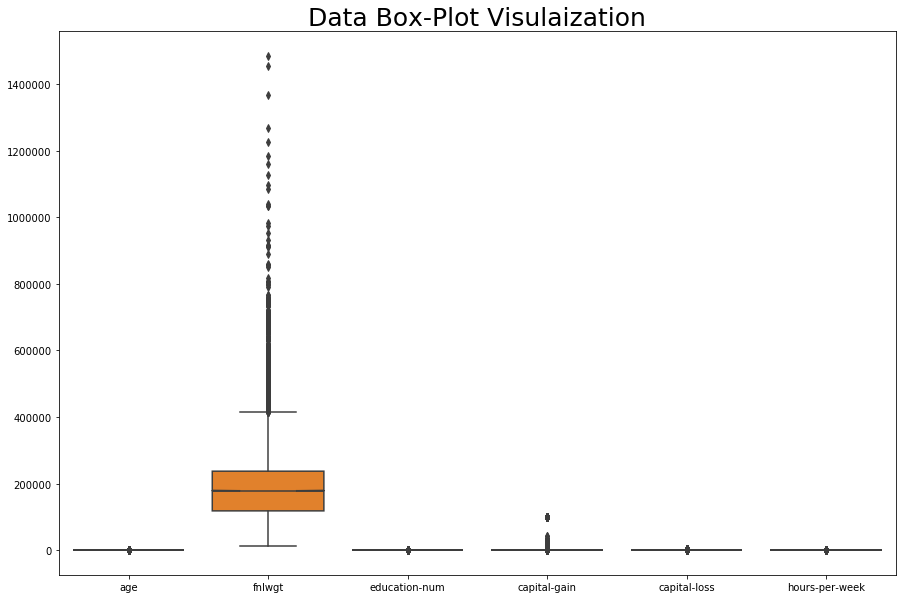

In [246]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df,notch=True)
plt.title('Data Box-Plot Visulaization',fontsize=25)

In [247]:
df['age'].nunique()

73

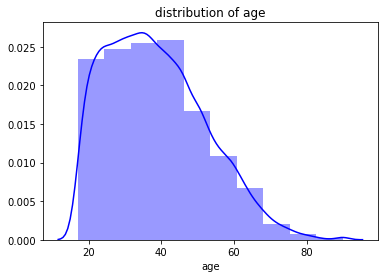

In [248]:
x=df['age']
sns.distplot(x,bins=10,color='blue')
plt.title('distribution of age')
plt.show()

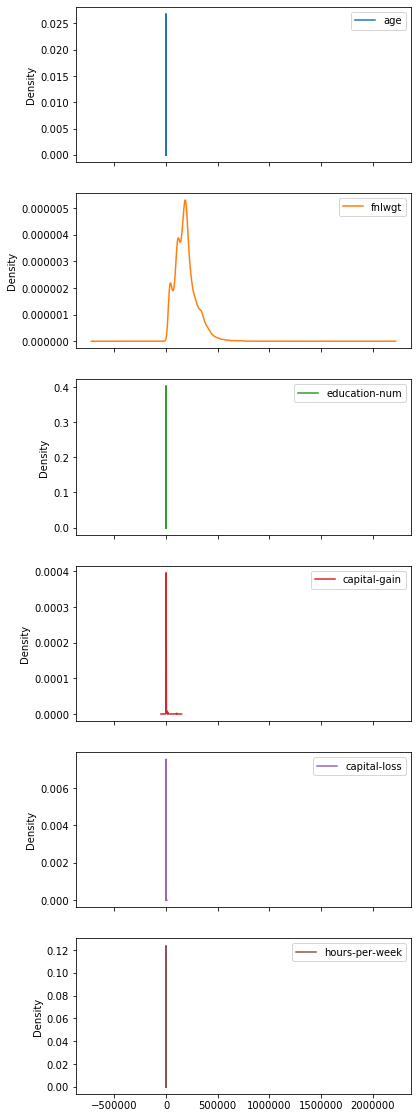

In [249]:
df.plot(kind='kde', subplots=True, figsize=(6,20), sharex=True )
plt.show()

In [250]:
### as we can see that younger people more money than elder people

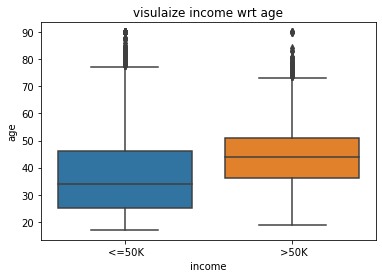

In [251]:
sns.boxplot(x='income',y='age',data=df)
plt.title('visulaize income wrt age')
plt.show()

In [252]:
### visualize income wrt age and sex

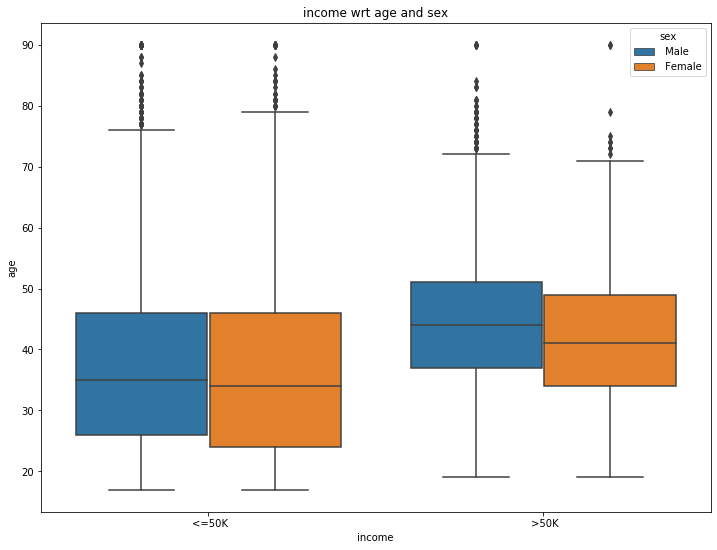

In [253]:
plt.figure(figsize=(12,9))
sns.boxplot(x='income',y='age',hue='sex',data=df)
plt.title('income wrt age and sex')
plt.show()

In [254]:
### whites are more older than other races

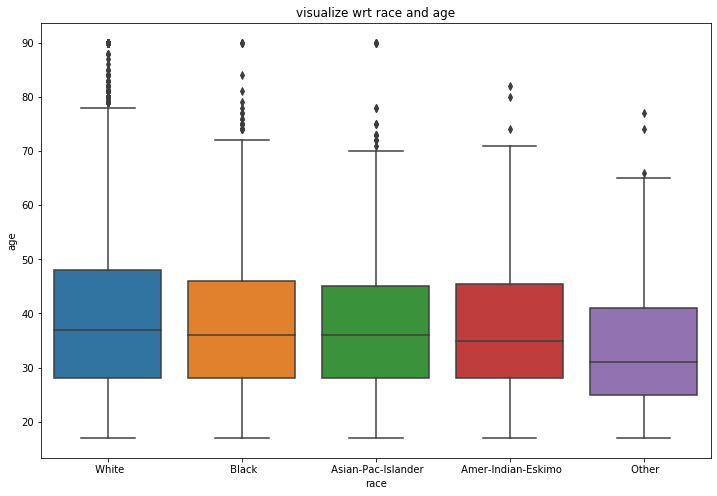

In [255]:
plt.figure(figsize=(12,8))
sns.boxplot(x='race',y='age',data=df)
plt.title('visualize wrt race and age')
plt.show()

In [256]:
### as we can see here there is no strong corelation between features

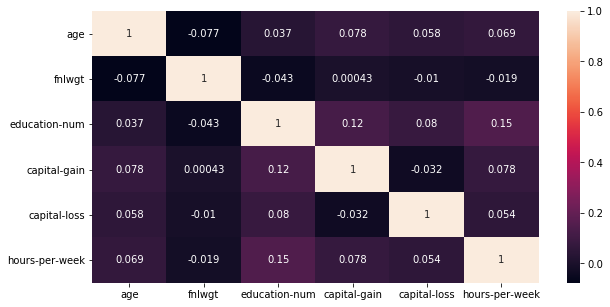

In [257]:
plt.figure(figsize=(10,5))
corr=df.corr()
sns.heatmap(data=corr,annot=True)

In [258]:
## pairplot between features

### age and fnlwgt are positively skewed
### education-num is -Vely skwed and hours per week is normally distributed


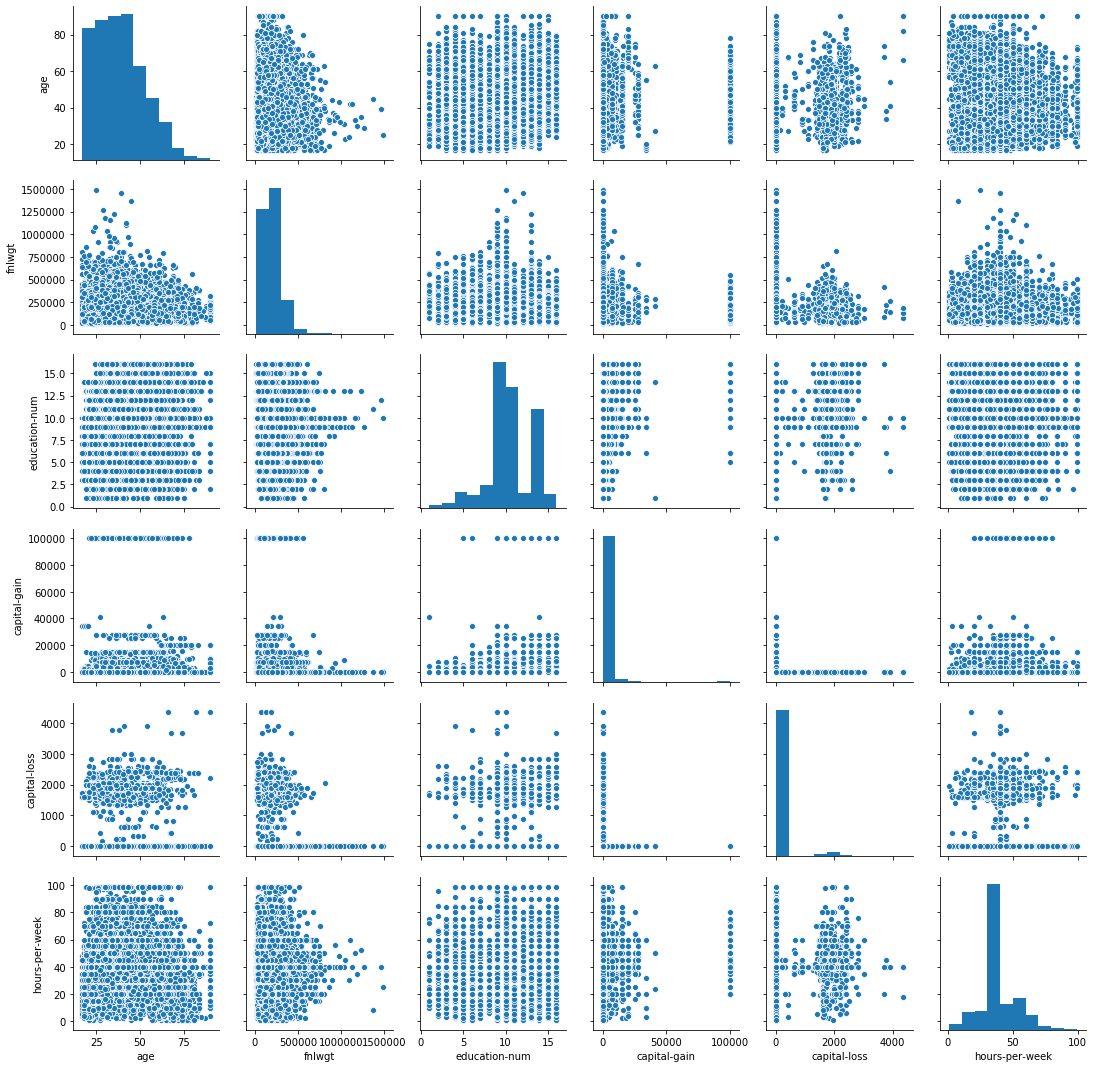

In [259]:
sns.pairplot(df)
plt.show()

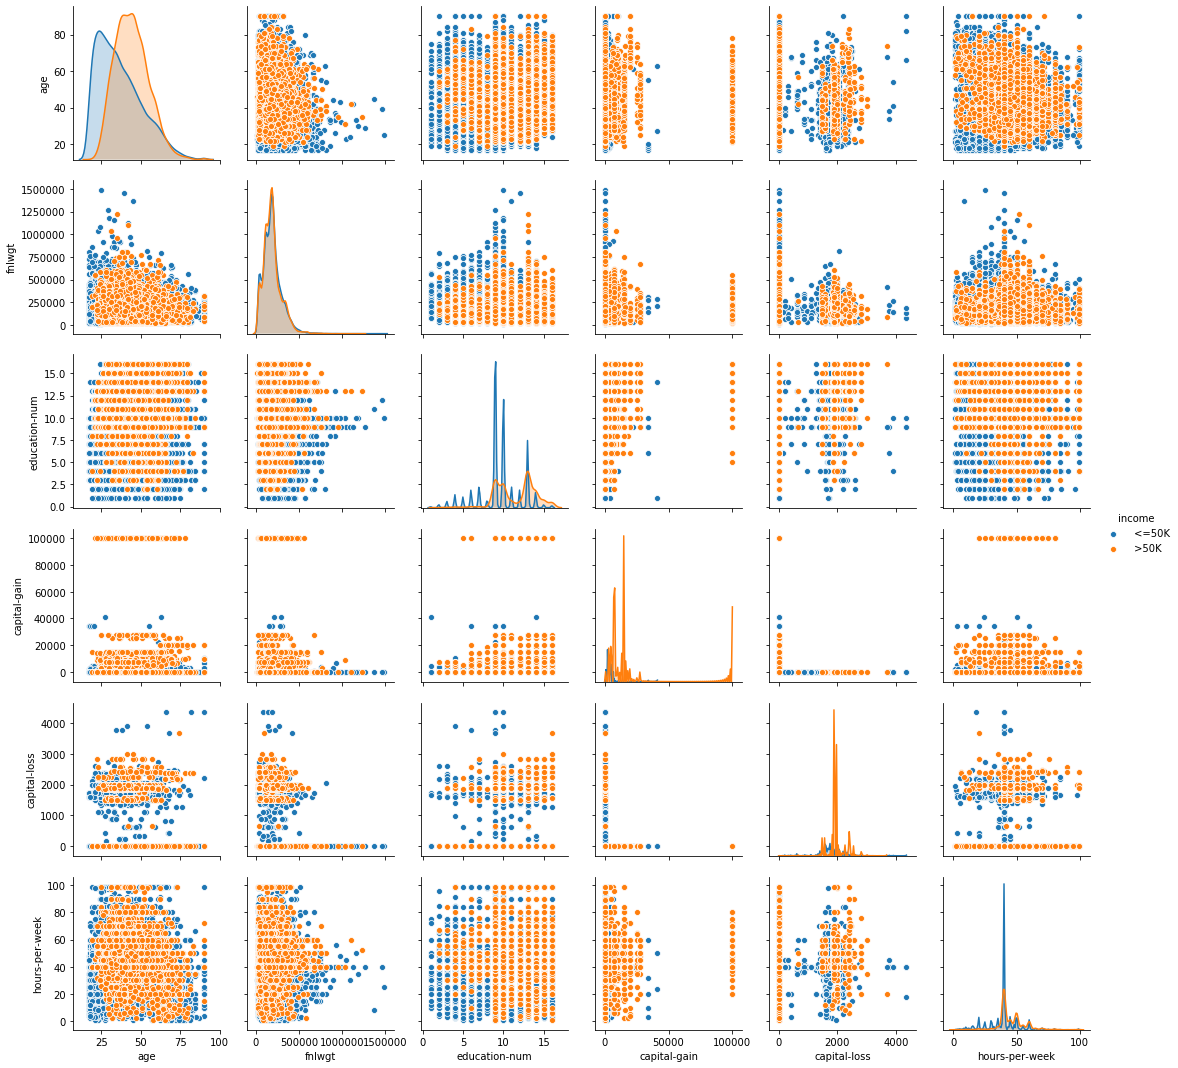

In [260]:
sns.pairplot(df,hue='income')
plt.show()

In [261]:
### spliting the feature in Independent and Dependent

In [262]:
x=df.drop(['income'],axis=1)
y=df['income']

In [263]:
print('Independent feature',x.shape)
print('Dependent feature',y.shape)

Independent feature (32561, 14)
Dependent feature (32561,)


In [264]:
### splitting the data into train and test 

In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [266]:
print('x_train size :',x_train.shape)
print('x_test size :',x_test.shape)
print()
print('y_train size :',y_train.shape)
print('y_test size :',y_test.shape)

x_train size : (22792, 14)
x_test size : (9769, 14)

y_train size : (22792,)
y_test size : (9769,)


In [267]:
### x_train categorical features

In [268]:
categorical=[col for col in x_train.columns if x_train[col].dtypes=='O']
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [269]:
### x_train numerical features

In [270]:
numerical=[col for col in x_train.columns if x_train[col].dtypes!='O' ]
numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [271]:
### as we can there are missing value in workclass,occupation and native-country

In [272]:
x_train[categorical].isnull().sum()

workclass         1276
education            0
marital-status       0
occupation        1278
relationship         0
race                 0
sex                  0
native-country     414
dtype: int64

In [273]:
x_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital-status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native-country    0.018164
dtype: float64

In [274]:
x_test[categorical].isnull().mean()

workclass         0.057324
education         0.000000
marital-status    0.000000
occupation        0.057836
relationship      0.000000
race              0.000000
sex               0.000000
native-country    0.017300
dtype: float64

In [275]:
### imputing missing value with most frequent value

In [276]:
for df2 in [x_train, x_test]:
    df2['workclass'].fillna(x_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(x_train['occupation'].mode()[0], inplace=True)
    df2['native-country'].fillna(x_train['native-country'].mode()[0], inplace=True) 

In [277]:
print('checking missing value with x_train')
print(x_train.isnull().sum())
print()
print('checking missing value with x_test')
print(x_train.isnull().sum())

checking missing value with x_train
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

checking missing value with x_test
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


In [278]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany


In [279]:
### applying category_encoders
import category_encoders as ce

In [280]:
encoders=ce.OneHotEncoder(cols=['workclass','education','marital-status','occupation','relationship','race',
                             'sex','native-country'])
x_train=encoders.fit_transform(x_train)
x_test=encoders.fit_transform(x_test)

In [281]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [282]:
x_train.drop(['native-country_41'],axis=1,inplace=True)

In [283]:
x_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [284]:
print('size of xtrain :',x_train.shape)
print('size of xtest :',x_test.shape)

size of xtrain : (22792, 104)
size of xtest : (9769, 104)


In [285]:
### applying feature scaling

In [286]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [287]:
## Applying Algorithms

### we have no idea which algo will be best and we evaluate algo by accuracy matrics and confusion matrix

In [88]:
model=[]
model.append(('Logistic Regression',LogisticRegression()))
model.append(('K Nearest Neighbour',KNeighborsClassifier()))
model.append(('Decision Tree',DecisionTreeClassifier()))
model.append(('Random Forest',RandomForestClassifier()))
model.append(('Support Vector Machine',SVC()))



In [89]:
result=[]
names=[]
for name,mode in model:
    kfold=KFold(n_splits=10,random_state=0)
    cv_result=cross_val_score(estimator=mode,X=x_train,y=y_train,cv=kfold,scoring='accuracy',)
    result.append(cv_result)
    names.append(name)
    print(f'model{name} --> mean : {cv_result.mean()} --> std: {cv_result.std()}')

modelLogistic Regression --> mean : 0.8454715826424332 --> std: 0.007214353867874009
modelK Nearest Neighbour --> mean : 0.8562649438427133 --> std: 0.005765232975948269
modelDecision Tree --> mean : 0.8171721399813707 --> std: 0.007934705215164973
modelRandom Forest --> mean : 0.8572745048228294 --> std: 0.004841950419972293
modelSupport Vector Machine --> mean : 0.8020796094008606 --> std: 0.00801405260506993


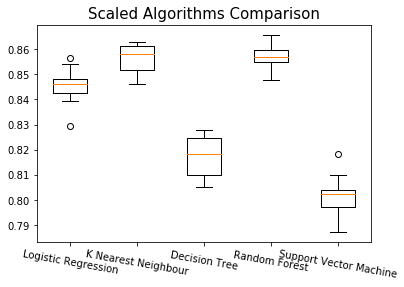

In [90]:
plt.boxplot(result, )
plt.xticks(np.arange(len(names))+1, names, rotation=-10)
plt.title('Scaled Algorithms Comparison', fontsize = 15)
plt.show()

In [91]:
# pipeline

# the work of pipeline is sequentially apply the process and follow through that work flow

In [92]:
pipeline=[]

pipeline.append(('Scaled_logistic',Pipeline([('Scalar',StandardScaler()),
                                           ('Logistic_regression',LogisticRegression())
                                           ])))
pipeline.append(('Scaled_knn',Pipeline([('Scaler',StandardScaler()),
                                      ('KNN',KNeighborsClassifier())
                                      ])))
pipeline.append(('Scaled_DT',Pipeline([('Scaler',StandardScaler()),
                                      ('DT',DecisionTreeClassifier())
                                      ])))
pipeline.append(('RandomForest',Pipeline([('Scaler',StandardScaler()),
                                      ('RandomForest',RandomForestClassifier())
                                      ])))
pipeline.append(('SVM',Pipeline([('Scaler',StandardScaler()),
                                      ('KNN',SVC())
                                      ])))

In [93]:
result=[]
names=[]
for name, model in pipeline:
    stratified_kfold=StratifiedKFold(n_splits=10,random_state=0)
    cv_result=cross_val_score(estimator=model,X=x_train,y=y_train,cv=stratified_kfold,scoring='accuracy')
    result.append(cv_result)
    names.append(name)
    print(f'model {name},  mean : {cv_result.mean()}, std : {cv_result.std()}')

model Scaled_logistic,  mean : 0.8508242688775471, std : 0.007995684405558217
model Scaled_knn,  mean : 0.8228318437603444, std : 0.00903526787139661
model Scaled_DT,  mean : 0.8184007105301647, std : 0.009749069024469427
model RandomForest,  mean : 0.8574055256614551, std : 0.005798163008807865
model SVM,  mean : 0.8483673394763785, std : 0.005117236209862821


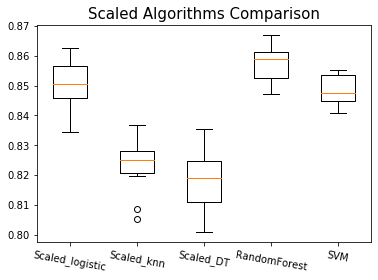

In [94]:
plt.boxplot(result )
plt.xticks(np.arange(len(names))+1, names, rotation=-10)
plt.title('Scaled Algorithms Comparison', fontsize = 15)
plt.show()

In [95]:
# comparing the accuracy between Standard Scaler And Robust Scaler 
# from here we can see that robust and standard scaler has different accuracies As we can see that Random forest perform better
# in both the scaler, logistic and SVM performs better in standardscaler,Knn and logistic performs better in Robust 

In [96]:
# Hyperparamter tunning

In [97]:
# Tunning Random Forest

In [127]:
rndm_frst=RandomForestClassifier()

In [99]:
rndm_frst.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Hyper parameter tunning

In [100]:

parameter = {'criterion': ["gini", "entropy"],
             'max_depth': [50,100,150,None],
             'n_estimators' : [8,10,12, 15, 17],
             'random_state' : [4, 10, 50,100],
             'max_features' :["auto", "sqrt", "log2", None]
            }

In [ ]:
# Applying StratifiedKFold it will make test and train data will be seprated in equal proptionate to overcome imbalance in data.

In [101]:
Stratifed_kfold=StratifiedKFold(n_splits=5,random_state=0)
grid=GridSearchCV(estimator=rndm_frst,param_grid=parameter,scoring='accuracy',cv=Stratifed_kfold)

In [102]:
grid_result=grid.fit(x_train,y_train)

In [ ]:
# Best Features by hyperparameter
# avg score 

In [109]:
print('Best Parameter : ',grid_result.best_params_)
print('score : ', grid_result.best_score_)

Best Parameter :  {'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'n_estimators': 17, 'random_state': 10}
score :  0.853851896075452


In [300]:
# applying best hyperparameters

In [288]:
clf=RandomForestClassifier(n_estimators=100,random_state=0)

In [289]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [290]:
prediction=model.predict(x_test)

In [291]:
print('Accuracy score :- ',accuracy_score(y_test, prediction)*100)

Accuracy score :-  76.83488586344559


In [ ]:
# confusion matrix

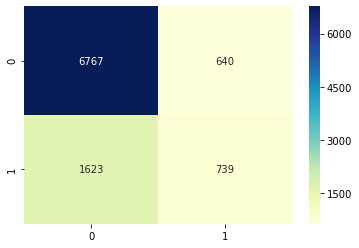

In [298]:
sns.heatmap(confusion_matrix(y_test,prediction), annot=True, fmt='d', cmap='YlGnBu')

In [297]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

       <=50K       0.81      0.91      0.86      7407
        >50K       0.54      0.31      0.40      2362

    accuracy                           0.77      9769
   macro avg       0.67      0.61      0.63      9769
weighted avg       0.74      0.77      0.75      9769

